In [39]:
import xarray as xr
from static import *
import gfdl_utils as gu
from xhistogram.xarray import histogram

In [40]:
# Load oxygen and oxygen flux data
config_id = 'ESM4_historical_D1'
rootdir = '/work/gam/zarr/'+config_id+'/'
filename = 'ocean_cobalt_omip_2d_1x1deg.ts.zarr'
ds_2d = xr.open_zarr(rootdir+filename)
filename = 'ocean_cobalt_omip_sfc_1x1deg.ts.zarr'
ds_sfc = xr.open_zarr(rootdir+filename)
ds = xr.merge([ds_2d,ds_sfc])
# Load grid file
pp = '/archive/oar.gfdl.cmip6/ESM4/DECK/'+config_id+'/gfdl.ncrc4-intel16-prod-openmp/pp'
ppname = 'ocean_cobalt_omip_2d_1x1deg'
grid = gu.core.open_static(pp,ppname)

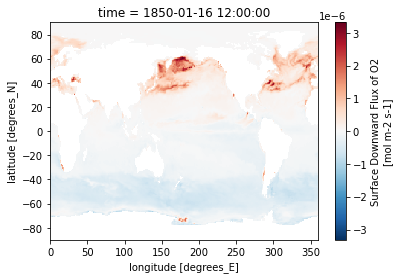

In [41]:
ds['fgo2'].isel(time=0).plot()

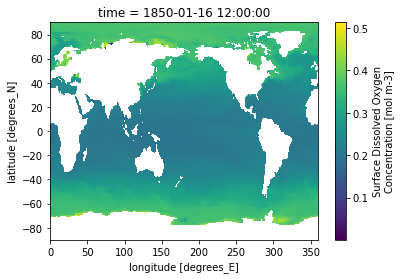

In [42]:
ds['o2os'].isel(time=0).plot()

In [114]:
dataset = 'esm4'
tracername = 'o2'
ascending=False
# Load tracer percentile info
tp = xr.open_dataset(path_tp(tracername,dataset,ascending))

In [115]:
dsmean = ds.coarsen(time=12).mean('time')

In [122]:
hs = xr.zeros_like(tp['tp'])
hs.name = 'F'
for t in range(len(tp['time'])):
    tpnow = tp.isel(time=t)
    dsnow = dsmean.isel(time=t)
    
    # Sort bins into ascending order for histogram
    # (Reversed before aligning with percentile again)
    o2_bins = np.sort(np.append(tpnow['tp'].values,0))
    
    hsnow = histogram(dsnow[tracername+'os'],
                      bins=[o2_bins],
                      dim=list(dsnow.dims),
                      weights=grid['areacello']*dsnow['fgo2'])
    hs[:,t] = hsnow[::-1] # Reverse order

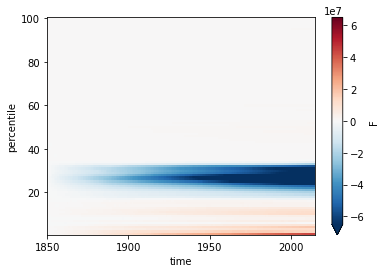

In [124]:
hs.cumsum('time').plot(robust=True)

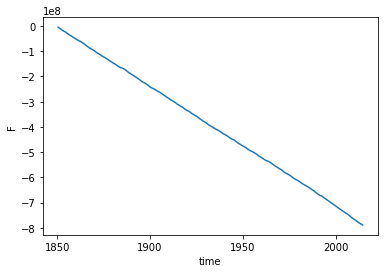

In [125]:
(hs.sum('percentile').cumsum('time')).plot()

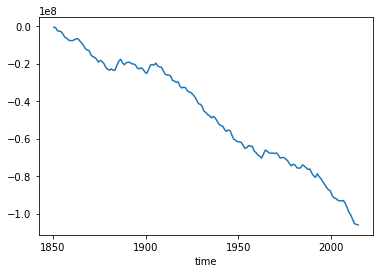

In [126]:
(dsmean['fgo2']*grid['areacello']).sum(['lat','lon']).cumsum('time').plot()